# Published Objects (Monthly Change) 


This shows the change in published object records. The Y-Axis represents object record numbers, in increments of 150,000 (so starting from O1). The
X-Axis show increments of 10,000. So each square represents 10,000 object records. A negative number indicates there are fewer object records now
published from that 10,000 then in the previous month, and positive indicates there are more.

In [ ]:
import pandas as pd
import bz2
import os
import fnmatch
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
# Load objects

latest_objects_df = pd.read_hdf('/home/richard/Git/bbk-mqaf/data/latest/field.h5')

In [85]:
previous_objects_df = pd.read_hdf('/home/richard/Git/bbk-mqaf/data/prev/field.h5')

In [86]:
latest_objects = latest_objects_df[' systemNumber']
latest_objects_str = latest_objects.tolist()
# Need to remove those object records that don't even have an object id
latest_objects_clean = [obj for obj in latest_objects_str if type(obj) == str]
latest_objects_num = [int(obj[1:]) for obj in latest_objects_clean]

In [87]:
previous_objects = previous_objects_df[' systemNumber']
previous_objects_str = previous_objects.tolist()
previous_objects_clean = [obj for obj in previous_objects_str if type(obj) == str]
previous_objects_num = [int(obj[1:]) for obj in previous_objects_clean]

In [88]:
bins = pd.interval_range(start=1,end=2250001,freq=10000)
d = dict(zip(bins, [f"{x}" for x in range(1, 22500001, 10000)]))

In [96]:
latest_identifier_space = {}
latest_identifer_bins = None
latest_identifier_bins = pd.cut(latest_objects_num, bins=bins, right=False, include_lowest=True).map(d).value_counts()

In [97]:
previous_identifier_space = {}
previous_identifer_bins = None
previous_identifier_bins = pd.cut(previous_objects_num, bins=bins, right=False, include_lowest=True).map(d).value_counts()


In [98]:
# Subtract last month from this month

change_identifier_bins = latest_identifier_bins - previous_identifier_bins

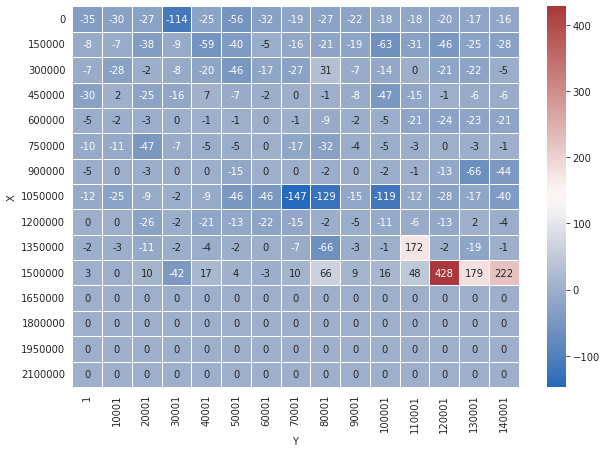

In [101]:
# Draw heatmap of change

df = pd.DataFrame()

x_axis = []
y_axis = []

for i in range(1, 16):
    for j in range(1, 16):
        x = (j-1)*10000 + 1
        y = (i-1)*150000 
        x_axis.append(x)
        y_axis.append(y)

# For some reason this is inverted
df = pd.DataFrame(data={'Object Record (O1 to O2100000)': y_axis, 'Object Record (10,000 per square)': x_axis, 'Data': change_identifier_bins})
objects = df.pivot("Object Record (O1 to O2100000)", "Object Record (10,000 per square)", "Data")

sns.set_style("dark")
sns.color_palette("deep")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 7))

heatmap = sns.heatmap(objects, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="vlag")
